# [의사결정나무: 실전]

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- 함수 ( ) 안에서 shift+tab: arguments description. shift+tab+tab은 길게 볼 수 있도록

## 1. 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [1]:
# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
data = pd.read_csv('../Data/cold.csv')
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,no2,ozone,co,blog,twitter,news,date
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,0.014465,0.027176,0.440329,1376,4390,38,mon
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,0.015039,0.030504,0.398744,2140,5754,28,wed
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,0.015470,0.034050,0.389116,746,2854,40,fri
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,0.015915,0.026960,0.494642,1183,4522,37,mon
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,0.015271,0.039251,0.430846,1145,5686,44,mon


## Cold 데이터
#### 전국의 기상정보 + SNS에서 'cold' 검색량을 사용해서, 환자들이 병원에 방문하여 진료를 받은 건수를 예측
#### 설명변수 및 반응변수
- <span style="color:blue">number_treatment - 진료 건수 <b>[타겟 변수]</b> <br></span>
- temperature, humidity, rain, wind, sunshine, insolation, pressure, so2, fin_dust, no2, ozone, co: 기상정보
- blog, twitter, news: SNS 검색량
- date: 요일

### date 변수에 대한 더미 변수 생성

In [3]:
# date: dummies
data = pd.get_dummies(data, columns=['date'], drop_first=True)
data.head()

,number_treatment,temperature,humidity,rain,wind,sunshine,insolation,pressure,so2,fine_dust,...,co,blog,twitter,news,date_mon,date_sat,date_sun,date_thu,date_tue,date_wed
0,388743,22.025106,93.278616,68.473728,2.165044,0.131501,3.086855,1009.446949,0.002651,12.263182,...,0.440329,1376,4390,38,1,0,0,0,0,0
1,356614,19.579263,89.477751,56.664520,2.274938,0.683480,2.312161,1008.240295,0.002773,15.111833,...,0.398744,2140,5754,28,0,0,0,0,0,1
2,272985,23.928169,89.207702,50.940484,2.260809,1.690144,4.656838,998.129844,0.003697,26.270188,...,0.389116,746,2854,40,0,0,0,0,0,0
3,401014,23.847571,89.890942,46.451352,1.941459,0.577617,3.206160,1007.132911,0.003285,28.431403,...,0.494642,1183,4522,37,1,0,0,0,0,0
4,508750,19.745406,82.521715,44.846233,3.147629,0.021221,2.478511,1010.317957,0.003787,44.558219,...,0.430846,1145,5686,44,1,0,0,0,0,0


### X, y로 구분

In [4]:
X = data.drop('number_treatment', axis=1)
y = data['number_treatment']

### 타겟 변수의 분포를 확인: 히스토그램

C:\Users\Jingu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


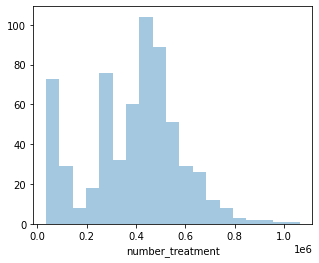

In [5]:
plt.figure(figsize=(5, 4))
sns.distplot(y, kde=False)
plt.show()

### 학습-평가 데이터셋 구성
- Train:Validation:Test = 60:20:20
- randomstate = 2020

In [6]:
random_state = 2020
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/10, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=2/8,
                                                      random_state=random_state)

### Decision Tree Regressor
- 최적의 max_depth를 선택해야 함
- Validation을 사용하여 Root Mean Squared Error(RMSE), Mean Absolute Error를 고려하여 선정


<center> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$
<center> $MAE=\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

#### 탐색할 max_depth 범위를 설정

In [7]:
max_depths = list(range(1, 10)) + [None]
print(max_depths)

[1, 2, 3, 4, 5, 6, 7, 8, 9, None]


#### RMSE, MAE로 모델을 평가

In [8]:
# 평가 지표 저장
rmse_valid = []
mae_valid = []

#### 반복문을 통해서 max_depth에 따른 성능 산출

In [11]:
for max_depth in max_depths:
                      
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # validation 예측
    y_valid_pred = model.predict(X_valid)
    
    # 모델 평가 결과 저장
    mse = mean_squared_error(y_valid, y_valid_pred) 
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_valid, y_valid_pred)
    
    rmse_valid.append(rmse)
    mae_valid.append(mae)

시각화를 위해 max_depths를 문자열로 바꿔준다

In [12]:
xticks = list(map(str, max_depths))
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'None']


#### 성능 지표별 line plot 그리기

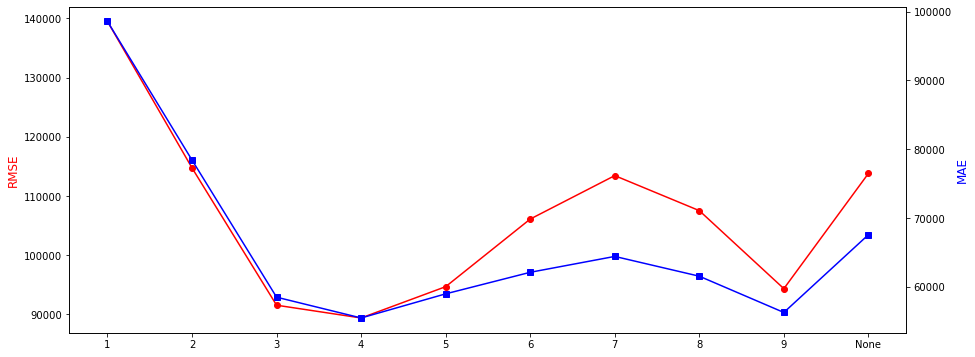

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(range(len(max_depths)), rmse_valid, color='red', marker='o')
ax.set_ylabel('RMSE', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), mae_valid, color='blue', marker='s')
ax2.set_ylabel('MAE', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

### 최적의 max_depth 설정

#### 해당 파라미터로 다시 모델을 학습

In [16]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

#### 평가 데이터에 대한 예측 결과 산출

In [18]:
# 에측 결과 산출
y_test_pred = model.predict(X_test)

# RMSE, MAE
mse = mean_squared_error(y_test, y_test_pred) 
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)

print('- RMSE (Test) : {:.1f}'.format(rmse))
print('- MAE  (Test) : {:.1f}'.format(mae))

- RMSE (Test) : 77863.0
- MAE  (Test) : 52898.2


## 결과 시각화

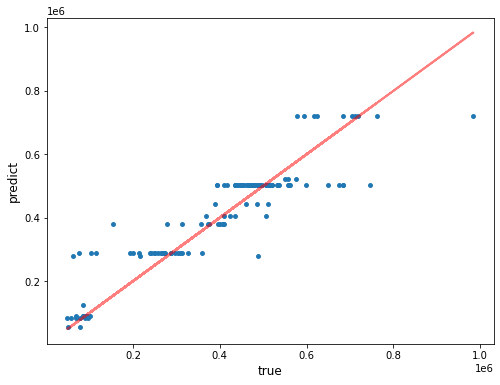

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, s=15)
plt.plot(y_test, y_test, alpha=0.5, lw=2, color='red')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.show()

## 규칙 시각화

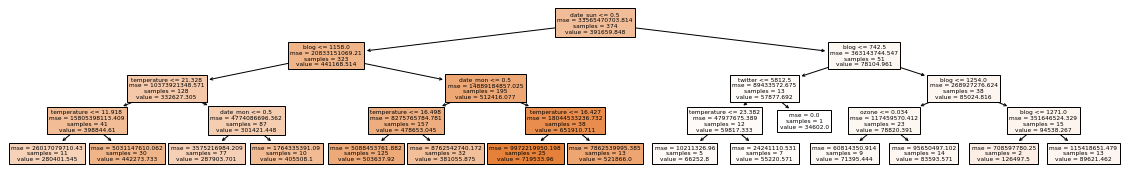

In [20]:
plt.figure(figsize=(20, 3))
plot_tree(decision_tree=model, filled=True, feature_names = X_train.columns)
plt.show()

## 변수 중요도: 공간을 split하는데 기여한 정도를 정량적으로 표현

#### 중요도 산출

In [21]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

#### bar chart로 시각화

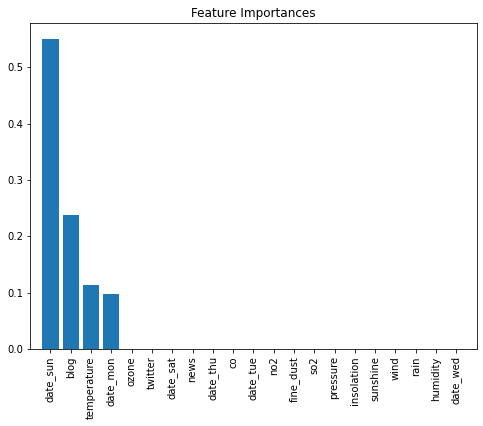

In [22]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(X.shape[1]), X.columns[index], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()